In [30]:
import numpy as np
import matplotlib.pyplot as plt
import smiba_dae
import smiba_env

In [31]:
model = smiba_dae.model()

In [40]:
p_m = 0.1
model.ini({'K_avr':100,'v_s':0.0,'p_m':p_m},
          {'delta':0.0,'omega':1.0, 'v_t':1.0,'theta':0.0,'v_f':1.0,'e1q':1.0})

True

In [41]:
model.report_x()
model.report_y()
model.report_u()

delta =  0.18
omega =  1.00
e1q   =  0.99
e1d   =  0.11
i_d   =  0.01
i_q   =  0.10
p_t   =  0.10
q_t   = -0.00
v_t   =  1.00
theta_t =  0.00
v_f   =  1.01
p_m   = 0.10
v_ref = 1.00
v_s   = 0.00
v_0   = 1.00


In [5]:
env = smiba_env.SmibaDAE()

In [6]:
env.reset()

array([ 0.9978529 ,  1.        ,  0.49921614, -0.10462663], dtype=float32)

In [8]:
env.step(np.array([0.0]))

(array([ 1.0063484 ,  1.0001248 ,  0.47363076, -0.14766818], dtype=float32),
 -3.6355566063051246,
 False,
 {})

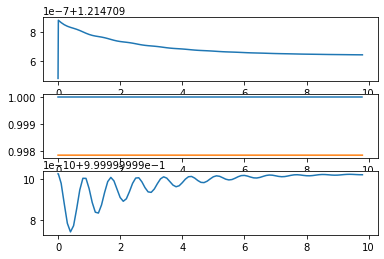

In [29]:
env.DV_0 = 1e-8
obs = env.reset()

v_t,omega,p_t,q_t = env.dae.get_mvalue(['v_t','omega','p_t','q_t'])

#env.dae.xy[0] = np.pi
times = np.arange(0,10,env.dt)
for t in times:
    v_s = -0*(1 - omega)
    env.dae.run(t,{'v_s':v_s,'v_0':env.v_0})
    v_t,omega,p_t,q_t = env.dae.get_mvalue(['v_t','omega','p_t','q_t'])
    obs = np.array([v_t,omega,p_t,q_t], dtype=np.float32)
env.dae.post();    

fig, axes = plt.subplots(nrows=3)
axes[0].plot(env.dae.Time,env.dae.get_values('v_f'))
axes[1].plot(env.dae.Time,env.dae.get_values('v_t')*0+env.v_0)
axes[1].plot(env.dae.Time,env.dae.get_values('v_t'))
axes[2].plot(env.dae.Time,env.dae.get_values('omega'))

In [44]:
model.save_xy_0('xy_0.json')

p_m = 0.5
model.ini({'K_avr':100,'v_s':0.0,'p_m':p_m},'xy_0.json')
model.report_x()
model.report_y()

delta =  0.83
omega =  1.00
e1q   =  0.77
e1d   =  0.46
i_d   =  0.30
i_q   =  0.42
p_t   =  0.50
q_t   = -0.10
v_t   =  1.00
theta_t =  0.01
v_f   =  1.21


In [7]:
!pip install --upgrade pydae

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pydae
    Found existing installation: pydae 0.23.0
    Uninstalling pydae-0.23.0:
      Successfully uninstalled pydae-0.23.0
